In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
#suppress warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score, f1_score
from sklearn.model_selection import StratifiedKFold


# Patient Readmission Prediction System
![Patient in Hospital](https://media.istockphoto.com/id/1194838627/vector/patient-in-hospital.jpg?s=1024x1024&w=is&k=20&c=ACwEATslOSLqpqHszgxWAOhcM66KbZ-xkgEgAeH8g1g=)

## Background
Hospital readmissions within 30 days of discharge are a major challenge in healthcare, affecting patient outcomes and increasing hospital costs. These readmissions often reflect inadequate post-discharge care, mismanagement of chronic conditions, or premature discharge. Reducing unplanned readmissions is crucial for improving patient care and optimizing hospital resources.

## Problem Statement
This project aims to develop a predictive machine learning model to identify patients at high risk of readmission within 30 days after discharge. The system will leverage Electronic Health Records (EHRs) containing demographic details, medical history, hospital stay information, treatment procedures, and post-discharge data to predict the likelihood of readmission. The model will be integrated into a Django-based web application to help hospitals proactively manage high-risk patients.

## Dataset Description
The dataset used in this project contains patient information, including:
- **Demographics**: Age, gender, BMI, ethnicity
- **Medical History**: Comorbidities like diabetes, hypertension, and heart disease
- **Hospital Stay**: Length of stay, ICU admissions, previous hospitalizations
- **Treatment Data**: Medications, lab tests, procedures
- **Post-Discharge**: Follow-up appointments and discharge instructions
- **Target Variable**: Readmission (Yes/No within 30 days)

## Approach
1. **Exploratory Data Analysis (EDA)**: Explore dataset trends and relationships using easy, intermediate, and advanced questions.
2. **Machine Learning Model**: Develop predictive models using logistic regression, random forest, XGBoost, and deep learning (MLP).
3. **Model Evaluation**: Use accuracy, precision, recall, F1-score, ROC-AUC, and SHAP for model evaluation.
4. **Deployment**: Deploy the model in a Django web application for hospital staff to predict readmission risk and generate reports.

The goal is to assist healthcare providers in reducing readmission rates through early identification of at-risk patients.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from scipy.stats import f_oneway

from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## First dataset **Diabetic Data**

In [4]:

diabetic_data_df = pd.read_csv('diabetic_data.csv')

# Display basic info
print("Diabetic Data Info:")
print(diabetic_data_df.info(), "\n")

Diabetic Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-nu

## Second Dataset **IDS MApping**

In [5]:
ids_mapping_df = pd.read_csv('IDS_mapping.csv')

print("IDS Mapping Info:")
print(ids_mapping_df.info(), "\n")


IDS Mapping Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   admission_type_id  65 non-null     object
 1   description        62 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None 



In [6]:
ids_mapping_df.head(50)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


In [7]:
# Split the DataFrame into separate tables based on known row indices
admission_type_df = ids_mapping_df.iloc[0:8]
discharge_disposition_df = ids_mapping_df.iloc[10:40].reset_index(drop=True)
admission_source_df = ids_mapping_df.iloc[42:].reset_index(drop=True)

admission_type_df.columns = ['admission_type_id', 'admission_type_desc']
discharge_disposition_df.columns = ['discharge_disposition_id', 'discharge_disposition_desc']
admission_source_df.columns = ['admission_source_id', 'admission_source_desc']


In [8]:
# Display the first few rows of each DataFrame
print("Admission Type DataFrame:")
admission_type_df

Admission Type DataFrame:


,admission_type_id,admission_type_desc
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [9]:
print("Discharge Disposition DataFrame:")
discharge_disposition_df


Discharge Disposition DataFrame:


,discharge_disposition_id,discharge_disposition_desc
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


In [10]:
print("Admission Source DataFrame:")
admission_source_df

Admission Source DataFrame:


,admission_source_id,admission_source_desc
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


## Merge all tables to map IDs


In [11]:
# Convert ID columns to integers to avoid dtype mismatches
admission_type_df.loc[:, 'admission_type_id'] = admission_type_df['admission_type_id'].astype(int)
discharge_disposition_df.loc[:, 'discharge_disposition_id'] = discharge_disposition_df['discharge_disposition_id'].astype(int)
admission_source_df.loc[:, 'admission_source_id'] = admission_source_df['admission_source_id'].astype(int)

In [12]:
# Merge with the main dataset
df = diabetic_data_df.merge(admission_type_df, on='admission_type_id', how='left')
df = df.merge(discharge_disposition_df, on='discharge_disposition_id', how='left')
df = df.merge(admission_source_df, on='admission_source_id', how='left')

In [13]:
# Drop old columns to avoid redundancy
df = df.drop(columns=['admission_type_id', 'discharge_disposition_id', 'admission_source_id'])


In [14]:
# Show basic info about the dataset (e.g., number of rows, columns, data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   encounter_id                101766 non-null  int64 
 1   patient_nbr                 101766 non-null  int64 
 2   race                        101766 non-null  object
 3   gender                      101766 non-null  object
 4   age                         101766 non-null  object
 5   weight                      101766 non-null  object
 6   time_in_hospital            101766 non-null  int64 
 7   payer_code                  101766 non-null  object
 8   medical_specialty           101766 non-null  object
 9   num_lab_procedures          101766 non-null  int64 
 10  num_procedures              101766 non-null  int64 
 11  num_medications             101766 non-null  int64 
 12  number_outpatient           101766 non-null  int64 
 13  number_emergency            1

***********
# Exploratory Data Analysis (EDA) - Easy Level Questions
***************
### 📌 Easy Level Questions
✅ What is the shape of the dataset? (Number of rows and columns)

✅ What are the data types of each column?

✅ Are there any missing values in the dataset? If yes, how should they be handled?

✅ What is the overall distribution of the target variable (readmission within 30 days: Yes/No)?

✅ What are the most common diagnoses among patients?

✅ What is the average age of patients?

### 1. **Shape of the Dataset**

In [15]:
# Get the shape of the dataset (rows, columns)
print("Shape of the dataset:", df.shape)
# 统计唯一患者数
num_patients = df['patient_nbr'].nunique()
print(f"患者总数: {num_patients}")

Shape of the dataset: (101766, 50)
患者总数: 71518


### 2. **Data Types of Each Column**

In [16]:
# 2. Data types of each column
print("\nData types of each column:")
print(df.dtypes)



Data types of each column:
encounter_id                   int64
patient_nbr                    int64
race                          object
gender                        object
age                           object
weight                        object
time_in_hospital               int64
payer_code                    object
medical_specialty             object
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                        object
diag_2                        object
diag_3                        object
number_diagnoses               int64
max_glu_serum                 object
A1Cresult                     object
metformin                     object
repaglinide                   object
nateglinide                   object
chlorpropamide                object
glimepiride                   object
acetohexam

### 3. **Missing Values in the Dataset**

In [17]:
# 3. Missing values in the dataset
print("\nMissing values in the dataset:")
print(df.isnull().sum())
print("\nMissing values shown as ? in the dataset")
print(df[df == "?"].count())


Missing values in the dataset:
encounter_id                      0
patient_nbr                       0
race                              0
gender                            0
age                               0
weight                            0
time_in_hospital                  0
payer_code                        0
medical_specialty                 0
num_lab_procedures                0
num_procedures                    0
num_medications                   0
number_outpatient                 0
number_emergency                  0
number_inpatient                  0
diag_1                            0
diag_2                            0
diag_3                            0
number_diagnoses                  0
max_glu_serum                 96420
A1Cresult                     84748
metformin                         0
repaglinide                       0
nateglinide                       0
chlorpropamide                    0
glimepiride                       0
acetohexamide                   

In [18]:
# Replace '?' with NaN
df.replace("?", np.nan, inplace=True)

# Calculate missing percentage for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Print missing percentage sorted in descending order
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))


weight                        96.858479
max_glu_serum                 94.746772
A1Cresult                     83.277322
medical_specialty             49.082208
payer_code                    39.557416
admission_source_desc          6.663326
admission_type_desc            5.199182
discharge_disposition_desc     3.626948
race                           2.233555
diag_3                         1.398306
diag_2                         0.351787
diag_1                         0.020636
dtype: float64


### 🔹  Drop Columns with Too Many Missing Values
- Drop weight, max_glu_serum, and A1Cresult (Too many missing values, not critical)
- Keep medical_specialty & payer_code (Can be filled with "Unknown" or mode)

In [19]:
df = df.drop(columns=["weight", "max_glu_serum", "A1Cresult"])


### 🔹  Fill Columns with unknown

In [20]:
# Categorical columns ke missing values ko "Unknown" se fill karna
df[["medical_specialty", "payer_code", "race"]] = df[["medical_specialty", "payer_code", "race"]].fillna("Unknown")

# Diagnosis columns ke missing values ko "Unknown" se fill karna
df[["diag_1", "diag_2", "diag_3"]] = df[["diag_1", "diag_2", "diag_3"]].fillna("Unknown")


### 🔹 Fill Categorical Missing Values


In [21]:
df[['admission_type_desc', 'discharge_disposition_desc', 'admission_source_desc']] = df[['admission_type_desc', 'discharge_disposition_desc', 'admission_source_desc']].fillna('Unknown')


## Final Check


In [22]:
print(df.isnull().sum().any())


False


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   encounter_id                101766 non-null  int64 
 1   patient_nbr                 101766 non-null  int64 
 2   race                        101766 non-null  object
 3   gender                      101766 non-null  object
 4   age                         101766 non-null  object
 5   time_in_hospital            101766 non-null  int64 
 6   payer_code                  101766 non-null  object
 7   medical_specialty           101766 non-null  object
 8   num_lab_procedures          101766 non-null  int64 
 9   num_procedures              101766 non-null  int64 
 10  num_medications             101766 non-null  int64 
 11  number_outpatient           101766 non-null  int64 
 12  number_emergency            101766 non-null  int64 
 13  number_inpatient            1

## Handling Missing Data in the Dataset

| Column Type                           | Action Taken |
|---------------------------------------|--------------|
| **Weight**                            | ❌ Dropped (97.7% missing) |
| **Max Glucose Serum, A1CResult**      | ❌ Dropped (Not useful for prediction) |
| **Payer Code**                        | ✅ Keep, fill missing with "Unknown" |
| **Medical Specialty**                 | ✅ Keep, replace missing with `"Unknown"` |
| **Race**                              | ✅ Keep, replace missing with `"Unknown"` |
| **Diagnosis Codes (`diag_1`, `diag_2`, `diag_3`)** | ✅ Keep, replace missing with `"Unknown"` |
| **Admission Type/Source/Discharge**   | ✅ Keep, replace missing with mode |

### ✅ **Now our dataset is ready for analysis! 🚀**


In [24]:
df.to_csv("cleaned_data.csv", index=False)
print("\nCleaned data saved in csv")



Cleaned data saved in csv


In [25]:
print(df.columns.tolist())

['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'admission_type_desc', 'discharge_disposition_desc', 'admission_source_desc']


### 4. **Distribution of the Target Variable (Readmission)**

In [26]:
print("\nDistribution of the target variable (readmitted):")
target_distribution = df['readmitted'].value_counts()
target_distribution


Distribution of the target variable (readmitted):


readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

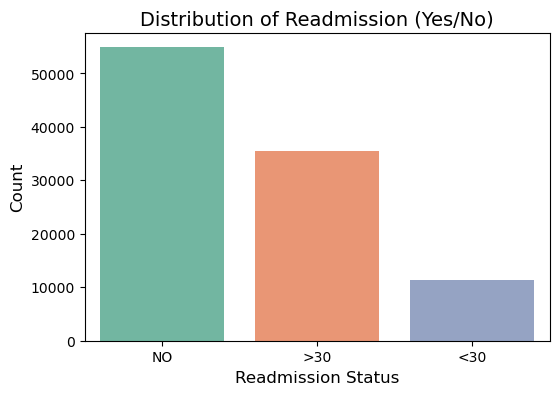

In [27]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='readmitted', palette='Set2')

# Adding title and labels
plt.title('Distribution of Readmission (Yes/No)', fontsize=14)
plt.xlabel('Readmission Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('Distribution_of_Readmission.png')

# Displaying the plot
plt.show()


### 5. **Most Common Diagnoses Among Patients**

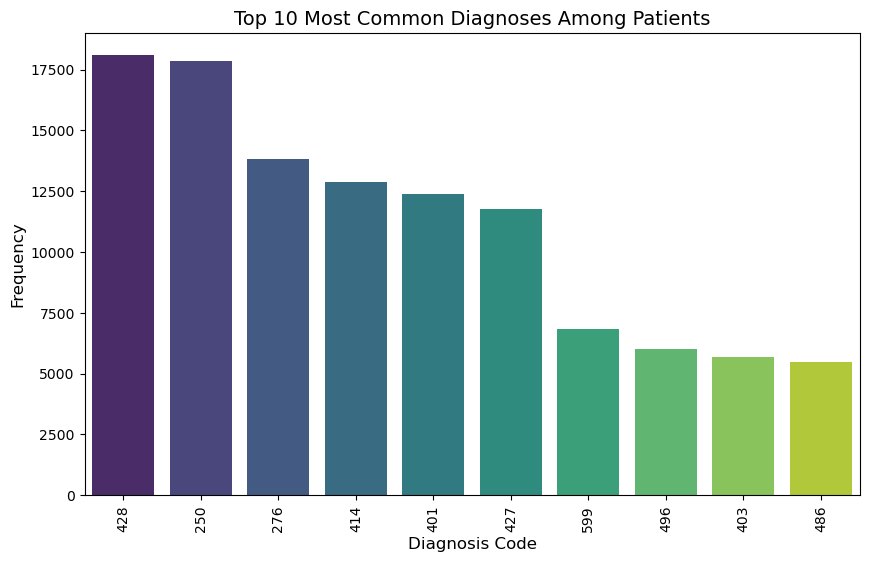

In [28]:
# Combine the three diagnosis columns
diagnosis_combined = pd.concat([df['diag_1'], df['diag_2'], df['diag_3']])

# Count the frequency of each diagnosis code
diagnosis_counts = diagnosis_combined.value_counts()

# Get the top 10 most common diagnoses
top_10_diagnoses = diagnosis_counts.head(10)

# Set up the plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_diagnoses.index, y=top_10_diagnoses.values, palette="viridis")

# Adding titles and labels
plt.title("Top 10 Most Common Diagnoses Among Patients", fontsize=14)
plt.xlabel("Diagnosis Code", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=90)
plt.savefig('Top 10 Most Common Diagnoses Among Patients.png')
plt.show()


### 6. **Average Age of Patients**
Since the `age` column contains categorical age ranges (e.g., '[0-10)', '[10-20)'), we map these categories to their respective average values using a dictionary. After the mapping, we calculate the average age of patients in the dataset using the `.mean()` method.


In [29]:
# Function to extract the midpoint from age ranges
def get_age_midpoint(age_range):
    lower, upper = age_range.strip('[]').split('-')
    return (int(lower) + int(upper.replace(')', ''))) / 2

# Apply the function to the 'age' column
df['age_midpoint'] = df['age'].apply(get_age_midpoint)

# Now calculate the average age
average_age = df['age_midpoint'].mean()

print(f"The average age of patients is: {average_age:.2f} years")


The average age of patients is: 65.97 years


## The average age of patients is: **65.97 years**

## 📌 Intermediate Level Questions
✅ Are there any duplicate records in the dataset?

✅ How does the length of hospital stay vary across different patient groups?

✅ How does the readmission rate vary by age group and gender?

✅ What is the relationship between comorbidities (e.g., diabetes, heart disease) and readmission rates?

✅ How does medication usage impact the likelihood of readmission?

✅ Do certain discharge conditions (e.g., home care vs. self-care) affect readmission risk?

✅ How does ICU admission correlate with readmission?

### 1. **Duplicated Records**

In [30]:
# Check for duplicate records in the dataset
duplicates = df.duplicated().sum()

print(f"Number of duplicate records: {duplicates}")


Number of duplicate records: 0


### 2. Hospital Stay Time vs Gender & Age_group

Average stay at hospital by Age Group In Days
age_group
0-10      2.546584
10-20     3.191027
20-30     3.564876
30-40     3.799735
40-50     4.039649
50-60     4.125753
60-70     4.382244
70-80     4.590878
80-90     4.808629
90-100    4.755818
Name: time_in_hospital, dtype: float64


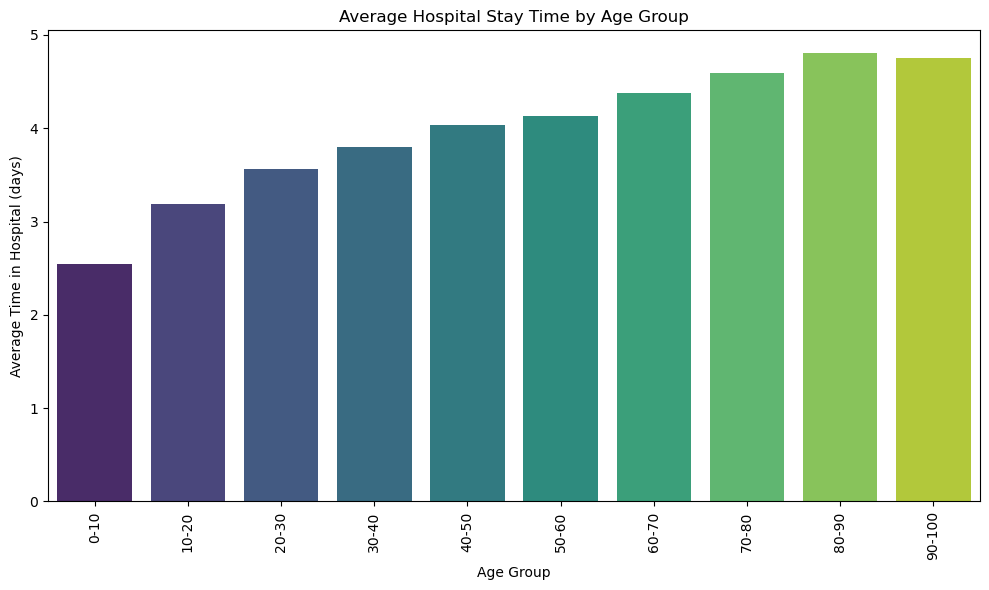

In [31]:
# You can also group by age categories and get the average length of stay
df['age_group'] = df['age'].str.extract(r'(\d+-\d+)')  # Extract age ranges from the 'age' column
avg_stay_by_age_group = df.groupby('age_group')['time_in_hospital'].mean()
print("Average stay at hospital by Age Group In Days")
print(avg_stay_by_age_group)

# Plotting the average hospital stay for different age groups
plt.figure(figsize=(10,6))
sns.barplot(x=avg_stay_by_age_group.index, y=avg_stay_by_age_group.values, palette="viridis")
plt.title("Average Hospital Stay Time by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Time in Hospital (days)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Average Time in Hospital (days).png')
plt.show()


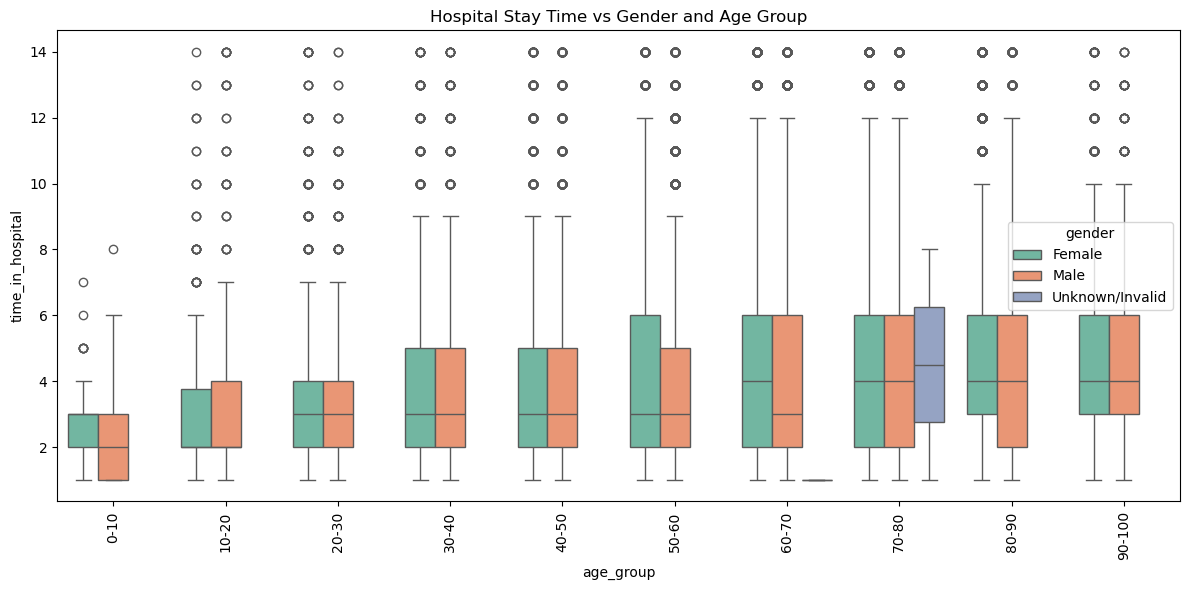

In [32]:
# First, ensure that the 'age' column has been processed into age groups
df['age_group'] = df['age'].str.extract(r'(\d+-\d+)')

# Now create a boxplot combining both 'gender' and 'age_group'
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='time_in_hospital', hue='gender', data=df, palette='Set2')
plt.title('Hospital Stay Time vs Gender and Age Group')
plt.xticks(rotation=90)
plt.tight_layout()
# Save the figure
plt.savefig('hospital_stay_time_vs_gender_age_group.png')
plt.show()


# 📊 Insights from Boxplot: "Time in Hospital vs. Age Group & Gender"

## ✅ Overall Trend:
- **Hospital stay increases with age.**  
  - Younger age groups (0-10, 10-20) have shorter stays.  
  - Older age groups (50-60, 60-70, etc.) show **higher median stays and more variation** (larger IQRs).  

## ✅ Gender-Based Comparison:
- **Males & females have similar median hospital stays across all age groups.**  
- Some older groups (**50-60, 60-70, 70-80**) show slightly **longer stays for females**.  

## ✅ Outliers:
- **Older patients (50+) have more outliers,** indicating some stay much longer than others.  

## ✅ Unknown/Invalid Gender:
- Found only in **70-80 age group** but follows the same trend.  
----------------------------------  


### 3. **Readmission rate  by age group and gender**

In [33]:
# Filter out rows where readmitted is 'NO'
df_readmitted = df[df['readmitted'] != 'NO']

# Group by 'age_group' and 'gender' and calculate the count of each 'readmitted' category
readmission_distribution = df_readmitted.groupby(['age_group', 'gender', 'readmitted']).size().unstack(fill_value=0)

# Calculate the percentage distribution of each readmission category
readmission_percentage = readmission_distribution.div(readmission_distribution.sum(axis=1), axis=0) * 100

# Display the results
readmission_percentage


readmitted              <30        >30
age_group gender                      
0-10      Female   7.142857  92.857143
          Male    13.333333  86.666667
10-20     Female  14.035088  85.964912
          Male    17.204301  82.795699
20-30     Female  33.843212  66.156788
          Male    26.457399  73.542601
30-40     Female  27.221597  72.778403
          Male    25.207756  74.792244
40-50     Female  23.269581  76.730419
          Male    24.466572  75.533428
50-60     Female  21.511628  78.488372
          Male    22.513089  77.486911
60-70     Female  23.112304  76.887696
          Male    25.014476  74.985524
70-80     Female  24.247368  75.752632
          Male    24.719876  75.280124
80-90     Female  24.956200  75.043800
          Male    25.158028  74.841972
90-100    Female  27.095990  72.904010
          Male    29.491525  70.508475

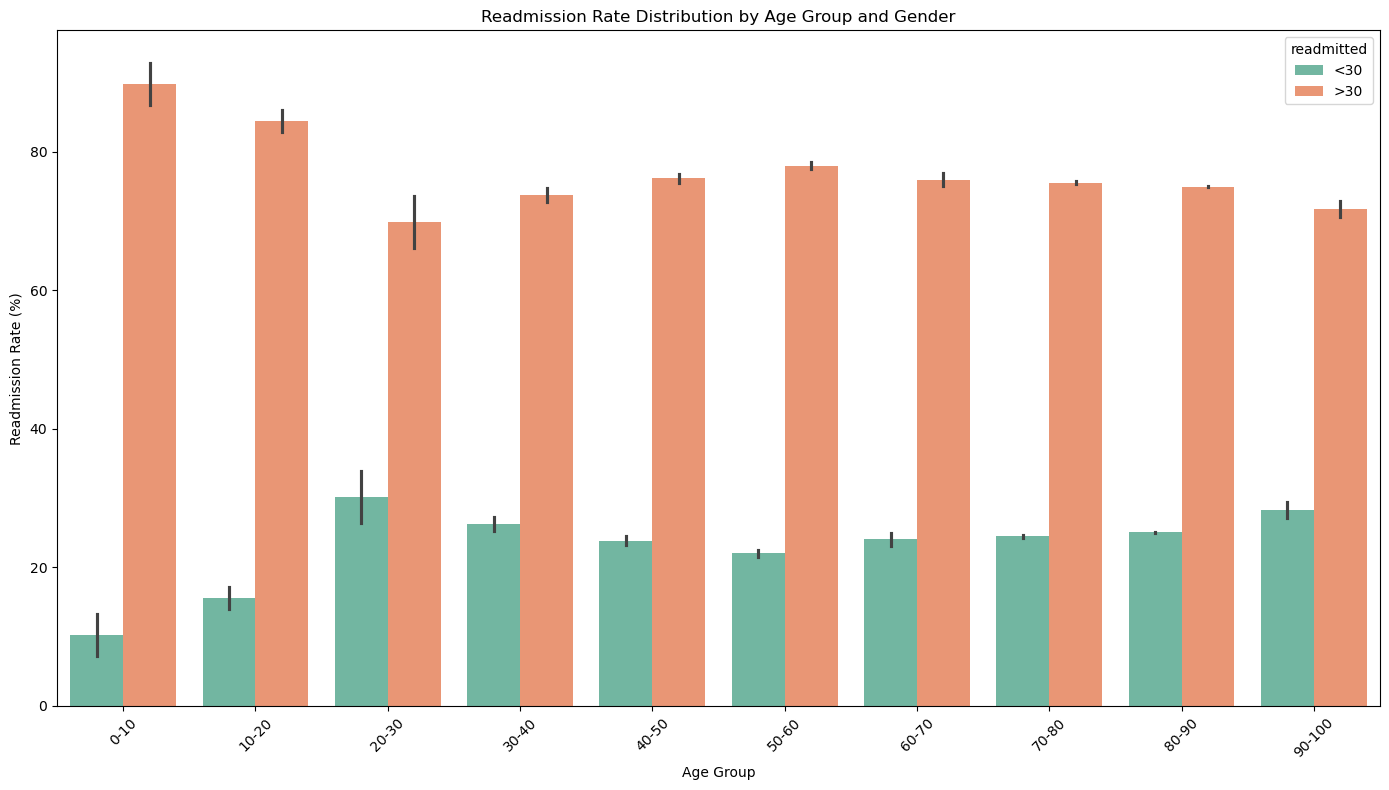

In [34]:
# Reshape the dataframe for plotting
readmission_percentage_melted = readmission_percentage.reset_index().melt(id_vars=['age_group', 'gender'], var_name='readmitted', value_name='percentage')

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='age_group', y='percentage', hue='readmitted', data=readmission_percentage_melted, palette='Set2')
plt.title('Readmission Rate Distribution by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Readmission Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


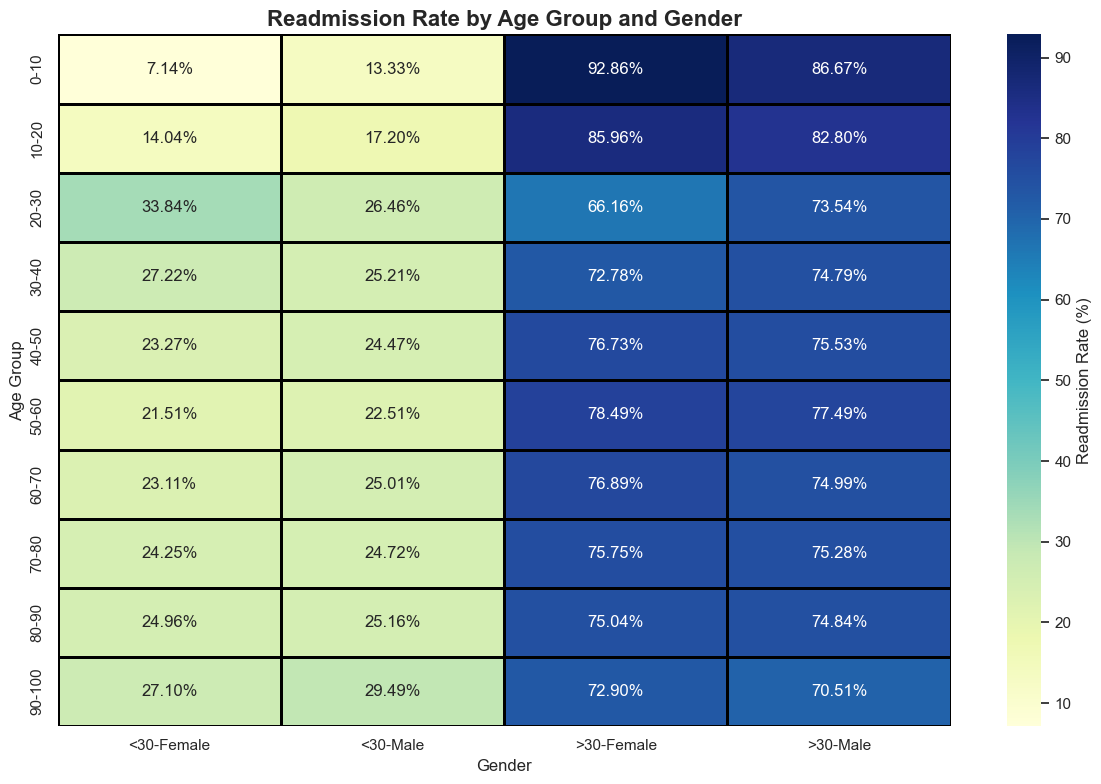

In [35]:
# Pivot the data for the heatmap (excluding 'NO')
heatmap_data = readmission_percentage[['<30', '>30']].reset_index().pivot(index='age_group', columns='gender', values=['<30', '>30'])

# Set a more advanced visual style
sns.set(style="whitegrid", palette="muted")

# Plot the heatmap with advanced customization
plt.figure(figsize=(12, 8))
ax = sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Readmission Rate (%)'}, linewidths=0.8, linecolor='black')

# Add annotations in percentage format
for text in ax.texts:
    text.set_text(f'{float(text.get_text()):.2f}%')  # Formatting the annotation as percentage

# Enhance the title and axis labels
plt.title('Readmission Rate by Age Group and Gender', fontsize=16, weight='bold')
plt.ylabel('Age Group', fontsize=12)
plt.xlabel('Gender', fontsize=12)

# Add grid lines for better visibility of heatmap cells
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='black')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### 📊 Readmission Rate Insights by Age Group & Gender

- **Youngest (0-10 & 10-20):** Lowest early readmission rates (<30 days), likely due to faster recovery.
- **Middle-Aged (20-60):** Readmission <30 days peaks in **20-30 age group** (~33%) and then decreases slightly.
- **Older Adults (60-90):** Readmission rates stabilize (~24-25%) but **increase after 90+ years** (~27-29%).
- **Gender Difference:**  
  - Males generally have a **higher late readmission rate (>30 days)** than females.
  - **Oldest males (90-100) have the highest early readmission rate (29.49%)**, indicating higher risk.  

### 🔹 Key Takeaways
✔ **Targeted follow-up care needed for young (20-30) & elderly (90+).**  
✔ **Males may need additional monitoring post-discharge.**  
✔ **Middle-aged (40-60) patients should be encouraged for better adherence to treatments.**
***********


### 4.  **Relationship between comorbidities (e.g., diabetes, heart disease) and Readmission Rates**

In [36]:
# Function to categorize comorbidities based on ICD-9 codes
def categorize_disease(diag_code):
    if pd.isna(diag_code):
        return "None"
    code = str(diag_code)
    if code.startswith('250'):
        return "Diabetes"
    elif code.startswith(('401', '402', '403', '404', '405')):
        return "Hypertension"
    elif code.startswith(('410', '411', '412', '413', '414', '428')):
        return "Heart Disease"
    elif code.startswith(('580', '581', '582', '583', '584', '585', '586', '587', '588', '589')):
        return "Kidney Disease"
    elif code.startswith(('460', '461', '462', '463', '464', '465', '466', '490', '491', '492', '493', '494', '495', '496', '497', '498', '499', '500', '501', '502', '503', '504', '505', '506', '507', '508', '509', '510', '511', '512', '513', '514', '515', '516', '517', '518', '519')):
        return "Respiratory Disease"
    else:
        return "Other"

# Apply the function to all diagnosis columns
df['comorbidity_1'] = df['diag_1'].apply(categorize_disease)
df['comorbidity_2'] = df['diag_2'].apply(categorize_disease)
df['comorbidity_3'] = df['diag_3'].apply(categorize_disease)

# Merge comorbidities into a single column
df['comorbidity'] = df[['comorbidity_1', 'comorbidity_2', 'comorbidity_3']].mode(axis=1)[0]
# Drop the individual comorbidity columns after merging
df.drop(columns=['comorbidity_1', 'comorbidity_2', 'comorbidity_3'], inplace=True)



comorbidity_readmission = df[df['readmitted'] != 'NO'].groupby('comorbidity')['readmitted'].value_counts(normalize=True).unstack() * 100


comorbidity_readmission

readmitted,<30,>30
comorbidity,,
Diabetes,23.530873,76.469127
Heart Disease,22.737416,77.262584
Hypertension,25.570033,74.429967
Kidney Disease,27.419355,72.580645
Other,24.777786,75.222214
Respiratory Disease,22.997172,77.002828


<Figure size 1200x600 with 0 Axes>

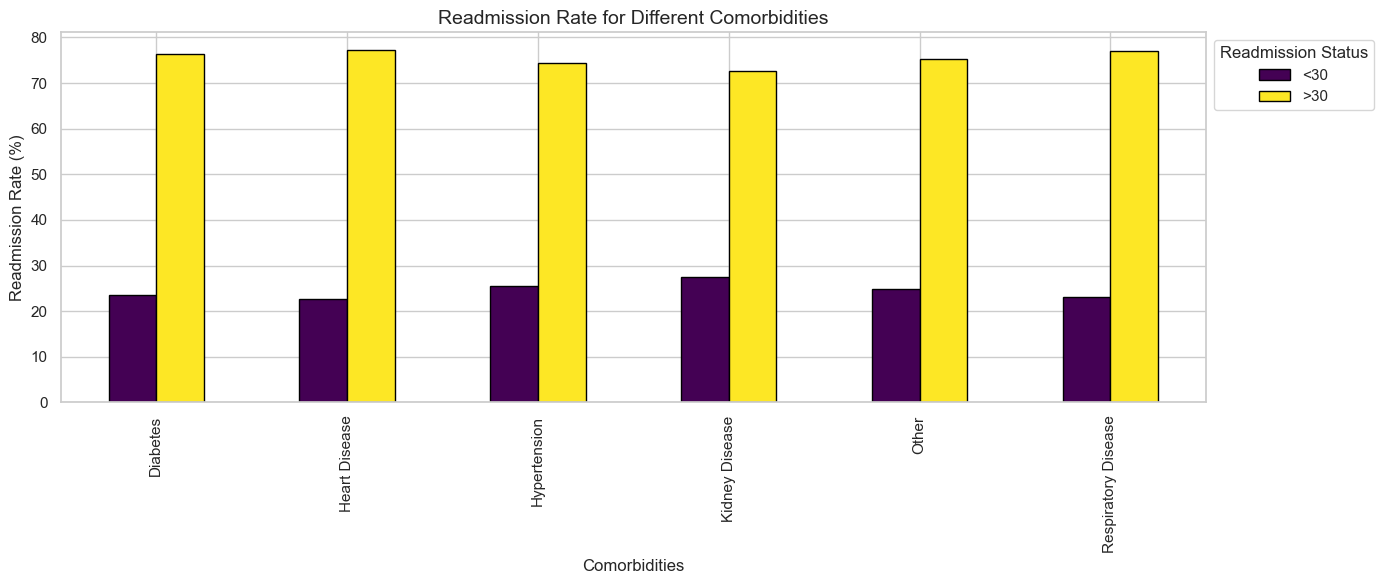

In [37]:
# Plotting
plt.figure(figsize=(12, 6))
comorbidity_readmission.plot(kind='bar', figsize=(14, 6), colormap='viridis', edgecolor='black')

plt.title("Readmission Rate for Different Comorbidities", fontsize=14)
plt.xlabel("Comorbidities", fontsize=12)
plt.ylabel("Readmission Rate (%)", fontsize=12)
plt.legend(title="Readmission Status", bbox_to_anchor=(1,1))
plt.tight_layout()

# Save and show
plt.savefig('readmission_vs_comorbidities.png')
plt.show()

## Insights: Relationship Between Comorbidities and Readmission Rate

1. **Diabetes:** 23.53% of patients were readmitted within 30 days, while 76.47% had a readmission after 30 days.
2. **Heart Disease:** Slightly higher readmission rate (>30 days) at 77.26%, with 22.74% readmitted within 30 days.
3. **Hypertension:** 25.57% of patients were readmitted within 30 days, indicating a moderate short-term readmission risk.
4. **Kidney Disease:** Highest short-term readmission rate at 27.42%, suggesting a more immediate risk of readmission.
5. **Respiratory Disease:** Lowest early readmission rate (22.99%), but 77% had readmission after 30 days.
6. **Other Conditions:** 24.78% short-term readmission, with 75.22% occurring later.

**Key Takeaways:**
- **Kidney disease** patients have the highest likelihood of early readmission (<30 days).
- **Heart and respiratory diseases** have the highest long-term readmission (>30 days).
- **Hypertension and diabetes** show moderate early readmission risks.

**Recommendation:** Special attention should be given to kidney disease patients to reduce short-term readmissions.
***********************************


###  5. **Medication Impact on Readmission**

In [38]:
# Extracting only medication columns
medication_cols = [
    'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
    'rosiglitazone', 'insulin', 'glyburide-metformin', 'glipizide-metformin'
]

# Creating a new dataframe with relevant columns
med_df = df[['readmitted'] + medication_cols].copy()  # Create med_df properly

# Removing "NO" readmissions
med_df = med_df[med_df['readmitted'] != 'NO']
print(med_df['readmitted'].unique())  # Debugging: Check remaining values

# Mapping dose change values
dose_mapping = {'Up': 'Increased', 'Down': 'Decreased', 'Steady': 'No Change', 'No': 'Not Given'}
for col in medication_cols:
    med_df[col] = med_df[col].map(dose_mapping).fillna("Not Given")  # Fix: Handle NaN values

# Reshaping Data
medication_readmission = med_df.melt(id_vars=['readmitted'], var_name='Medication', value_name='Dose Change')

# Analyzing readmission rate per medication
medication_summary = medication_readmission.groupby(['Medication', 'Dose Change'])['readmitted'].value_counts(normalize=True).unstack() * 100



['>30' '<30']


In [39]:

medication_summary.loc[medication_summary["<30"] == 100, "<30"] = np.nan
medication_summary.loc[medication_summary[">30"] == 100, ">30"] = np.nan


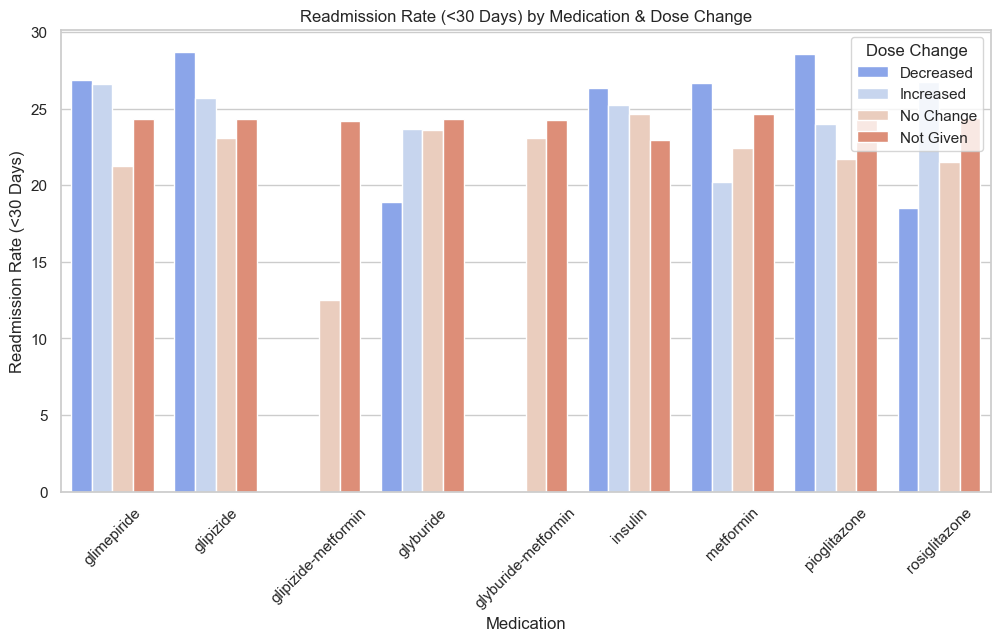

In [40]:
# Reset index for easy plotting
medication_summary_reset = medication_summary.reset_index()

# 🎯 Bar Plot: Readmission Rate by Medication & Dose Change
plt.figure(figsize=(12, 6))
sns.barplot(data=medication_summary_reset, x="Medication", y="<30", hue="Dose Change", palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Medication")
plt.ylabel("Readmission Rate (<30 Days)")
plt.title("Readmission Rate (<30 Days) by Medication & Dose Change")
plt.legend(title="Dose Change")
plt.savefig("Readmission Rate (<30 Days) by Medication & Dose Change,png")
plt.show()



/var/folders/4m/077v5vmn62l9n5_cg7djvzl80000gn/T/ipykernel_9904/3193631022.py:26: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()  # Ensures proper spacing
/var/folders/4m/077v5vmn62l9n5_cg7djvzl80000gn/T/ipykernel_9904/3193631022.py:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.savefig("📊 Readmission Rates (<30 Days) by Medication & Dose Change.png")
/opt/anaconda3/envs/PPHR/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


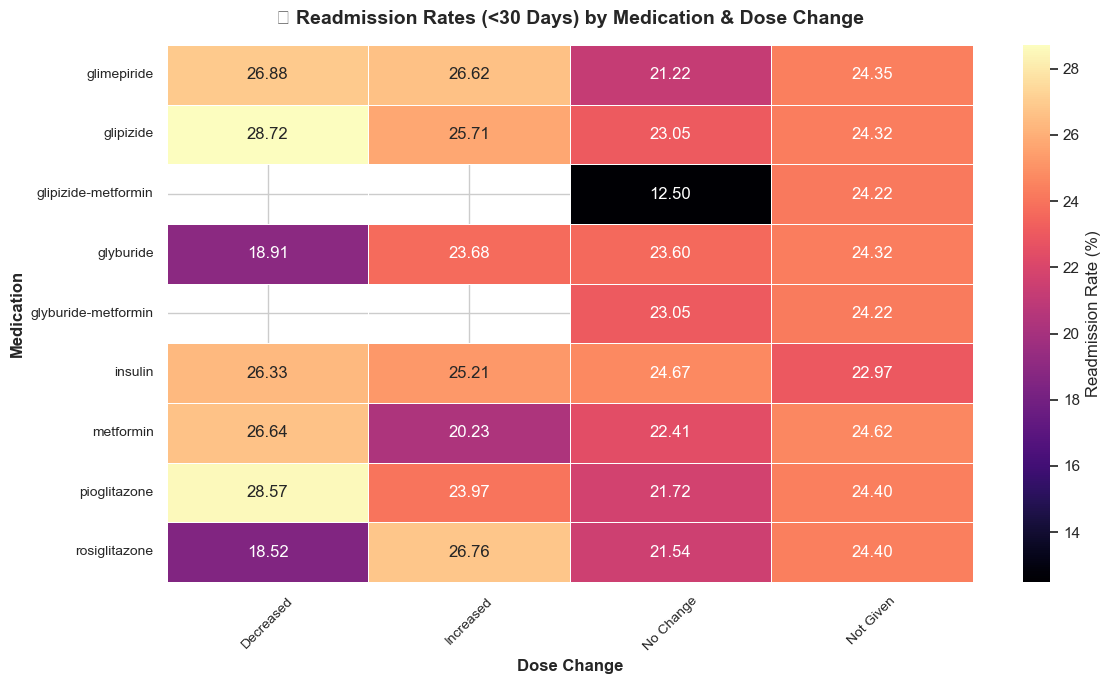

In [41]:
# 🎯 Heatmap: Readmission Rates
plt.figure(figsize=(12, 7))  # Slightly larger for better readability

# Creating pivot table
pivot_table = medication_summary_reset.pivot(index="Medication", columns="Dose Change", values="<30")

# Improved heatmap styling
sns.heatmap(
    pivot_table,
    annot=True,
    cmap="magma",  # High-contrast and visually appealing colormap
    fmt=".2f",
    linewidths=0.7,
    cbar_kws={'label': 'Readmission Rate (%)'}  # Adds a color bar label
)

# Enhancing title and labels
plt.title("📊 Readmission Rates (<30 Days) by Medication & Dose Change", fontsize=14, fontweight="bold", pad=15)
plt.ylabel("Medication", fontsize=12, fontweight="bold")
plt.xlabel("Dose Change", fontsize=12, fontweight="bold")

# Improving tick readability
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()  # Ensures proper spacing
plt.savefig("📊 Readmission Rates (<30 Days) by Medication & Dose Change.png")
plt.show()


## 📊 Medication Dose Change & Readmission Insights

### 🔹 Key Findings:
- **Higher Readmission with Dose Adjustments**  
  - Increased or decreased medication doses correlate with **higher <30-day readmission rates**.
  - Example: **Metformin (Increased: 20.23%, Decreased: 26.64%)**.

- **Stable Doses ("No Change") Show Lower Readmission**  
  - Patients with **no dose changes** generally had **fewer early readmissions**.
  - Example: **Glimepiride (No Change: 21.22%)**.

- **Insulin & Glyburide Have the Lowest Readmission Rates**  
  - **Insulin (Not Given: 22.97%)**, **Glyburide (No Change: 23.60%)**.

- **Potential Data Imbalance**  
  - Some cases (e.g., **Glyburide-Metformin**) show **100% readmission**, suggesting **low sample size issues**.

### 📌 Conclusion:
- **Dose changes increase readmission risk**.
- **Stable medications lead to better patient outcomes**.
- **Further validation needed for extreme values**.
*********

 ### 6. **Discharge Disposition (e.g., home care vs. self-care) Impact Readmission Rates**

In [42]:
df_filtered = df[df['readmitted'] != 'NO']

discharge_summary = df_filtered.groupby("discharge_disposition_desc")["readmitted"].value_counts(normalize=True).unstack() * 100

discharge_summary

readmitted,<30,>30
discharge_disposition_desc,,
Admitted as an inpatient to this hospital,81.818182,18.181818
Discharged to home,20.657104,79.342896
Discharged/transferred to ICF,27.225131,72.774869
Discharged/transferred to SNF,29.388107,70.611893
Discharged/transferred to a federal health care facility.,NaN,100.000000
Discharged/transferred to a long term care hospital.,17.241379,82.758621
Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.,30.434783,69.565217
Discharged/transferred to another rehab fac including rehab units of a hospital .,51.540616,48.459384
Discharged/transferred to another short term hospital,33.861386,66.138614


<Figure size 800x1000 with 0 Axes>

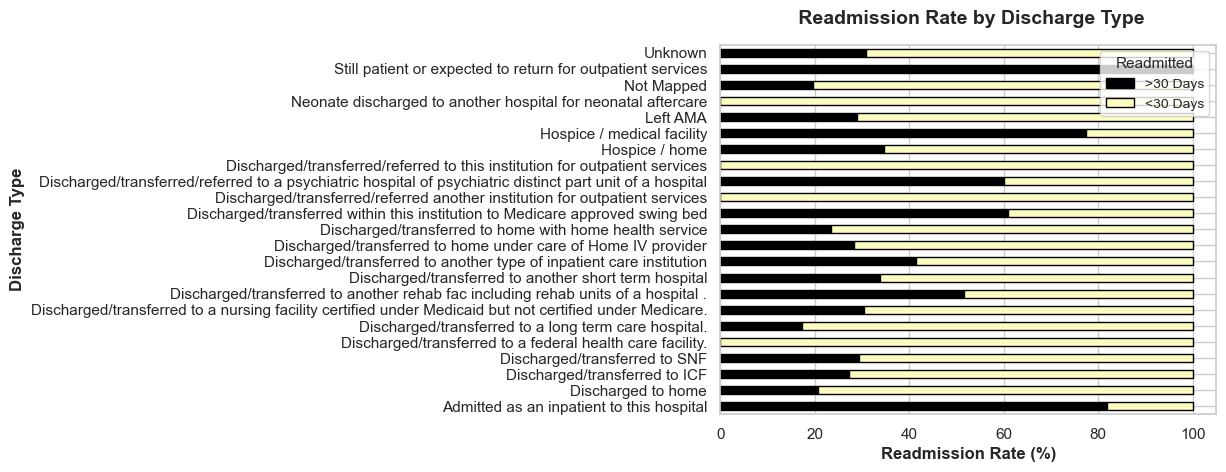

In [43]:
plt.figure(figsize=(8, 10))  # Taller figure for vertical bars

# Plotting vertical stacked bar chart
discharge_summary.plot(
    kind="barh",  # Horizontal bar chart for better readability
    stacked=True,
    colormap="magma",  # More visually appealing colormap
    edgecolor="black"  # Adds contrast to bars
)

# Enhancing labels and title
plt.xlabel("Readmission Rate (%)", fontsize=12, fontweight="bold")
plt.ylabel("Discharge Type", fontsize=12, fontweight="bold")
plt.title(" Readmission Rate by Discharge Type", fontsize=14, fontweight="bold", pad=15)

# Improving legend clarity
plt.legend(title="Readmitted", labels=[">30 Days", "<30 Days"], fontsize=10, title_fontsize=11)
plt.show()


# 📊 Insights from Readmission Rate by Discharge Type  

## 🔍 Key Findings  

### 1️⃣ Higher Short-Term Readmission (<30 Days)  
- **Admitted as an inpatient to this hospital** has the **highest** early readmission rate.  
- **Discharged/transferred within the same institution (Medicare swing bed, psychiatric hospital, rehab units)** show **notably high** early readmission risks.  
- **Patients in hospice care (home or medical facility) and those who left AMA** also have a significant proportion of <30-day readmissions.  

### 2️⃣ Higher Long-Term Readmission (>30 Days)  
- **Discharged to home** has **one of the highest late readmission rates (>30 days).**  
- **Patients transferred to SNF (Skilled Nursing Facility), ICF (Intermediate Care Facility), and long-term hospitals** show **higher late readmission risks.**  
- **Discharged/transferred to another short-term hospital or outpatient services also increases >30-day readmission risk.**  

### 3️⃣ Lowest Readmission Rates  
- **Still patient or expected to return for outpatient services** shows **lower readmission** compared to other categories.  
- **Neonatal transfers and hospice-related discharges** show **very high late readmission rates (>30 days)** but **almost no short-term readmission.**  

---

## 🏥 Key Takeaways  
✔️ **Patients discharged home may not receive adequate follow-up care, leading to later readmissions.**  
✔️ **Inpatient hospital stays & rehab discharges have higher short-term readmission risks.**  
✔️ **Long-term care facilities & hospice cases show delayed but eventual readmissions.**  
✔️ **Left AMA (Against Medical Advice) patients have unpredictable readmission risks, likely due to insufficient care post-discharge.**  

---



### 7. **ICU admission correlation with readmission**

In [44]:
# Create binary ICU column (1 for ICU, 0 for Non-ICU)
df_readmitted['icu_admission'] = df_readmitted['admission_source_desc'].str.contains(
    'Emergency Room|Transfer from critical access hospital|Transfer from a hospital',
    case=False, na=False
).astype(int)

# Check the first few rows to make sure it's correct
df_readmitted[['admission_source_desc', 'icu_admission']].head()


/var/folders/4m/077v5vmn62l9n5_cg7djvzl80000gn/T/ipykernel_9904/637529420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_readmitted['icu_admission'] = df_readmitted['admission_source_desc'].str.contains(


,admission_source_desc,icu_admission
1,Emergency Room,1
5,Clinic Referral,0
7,Emergency Room,1
10,Emergency Room,1
11,Transfer from a hospital,1


In [45]:
# Map the 'readmitted' column to numeric values
df_readmitted['readmission_numeric'] = df_readmitted['readmitted'].map({
    'NO': 0,       # Not readmitted
    '>30': 1,      # Readmitted after 30 days
    '<30': 2       # Readmitted within 30 days
})

# Check the first few rows to verify the mapping
df_readmitted[['readmitted', 'readmission_numeric']].head()


/var/folders/4m/077v5vmn62l9n5_cg7djvzl80000gn/T/ipykernel_9904/609615408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_readmitted['readmission_numeric'] = df_readmitted['readmitted'].map({


,readmitted,readmission_numeric
1,>30,1
5,>30,1
7,>30,1
10,>30,1
11,<30,2


In [46]:
# Calculate Pearson's correlation
correlation = df_readmitted['icu_admission'].corr(df_readmitted['readmission_numeric'])
print("Pearson's Correlation between ICU admission and readmission status:", correlation)
# Create a contingency table for ICU vs readmission status
contingency_table = pd.crosstab(df_readmitted['icu_admission'], df_readmitted['readmitted'])

# Calculate Cramér's V
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print("Cramér's V between ICU admission and readmission status:", cramers_v)


Pearson's Correlation between ICU admission and readmission status: -0.008462291937326224
Cramér's V between ICU admission and readmission status: 0.008410856479759473


 ICU入院与再入院（无论30天内还是30天后）之间没有显著关系。也就是说，是否ICU入院，对再入院概率没有明显影响。
这提示：预测再入院时，ICU入院不是一个有用的特征，应该关注其他变量（如年龄、基础疾病、出院方式等）

## Insights: Correlation Between ICU Admission and Readmission Status

### 1. **Correlation Results:**
   - **Pearson's Correlation**: '-0.00846`
   - **Cramér's V**: `0.00841`

### So Basically,
- ICU admission **does not significantly impact** the likelihood of readmission.  
- Other factors like **patient condition, treatment quality, and comorbidities** may play a bigger role in predicting readmission.  
- Further analysis on variables like **length of stay, age, and discharge condition** could provide better insights.  

*******************
*************

## 📌 Advanced Level Questions
✅ Can we identify the top 10 features that influence readmission the most?

✅ How does readmission probability change over time (seasonality analysis)?


✅ Can we detect anomalies in readmission patterns using unsupervised learning (e.g., Isolation Forest, DBSCAN)?

✅ How do hospital characteristics (e.g., bed availability, staffing levels) impact readmission?

✅ Can we visualize correlations using a heatmap to identify multicollinearity?

✅ Do patients with multiple previous readmissions have distinct risk profiles?



### Make a copy , so we we want to use original data in any question  we can use without any modiofications or preprocessing

In [47]:
# Keep an untouched copy for reference
df_original = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   encounter_id                101766 non-null  int64  
 1   patient_nbr                 101766 non-null  int64  
 2   race                        101766 non-null  object 
 3   gender                      101766 non-null  object 
 4   age                         101766 non-null  object 
 5   time_in_hospital            101766 non-null  int64  
 6   payer_code                  101766 non-null  object 
 7   medical_specialty           101766 non-null  object 
 8   num_lab_procedures          101766 non-null  int64  
 9   num_procedures              101766 non-null  int64  
 10  num_medications             101766 non-null  int64  
 11  number_outpatient           101766 non-null  int64  
 12  number_emergency            101766 non-null  int64  
 13  number_inpatie

In [48]:
df_original.to_csv("preprocessed_data.csv", index=False)  # Save as CSV

In [49]:
#df = df_original

### Seasonality Analysis

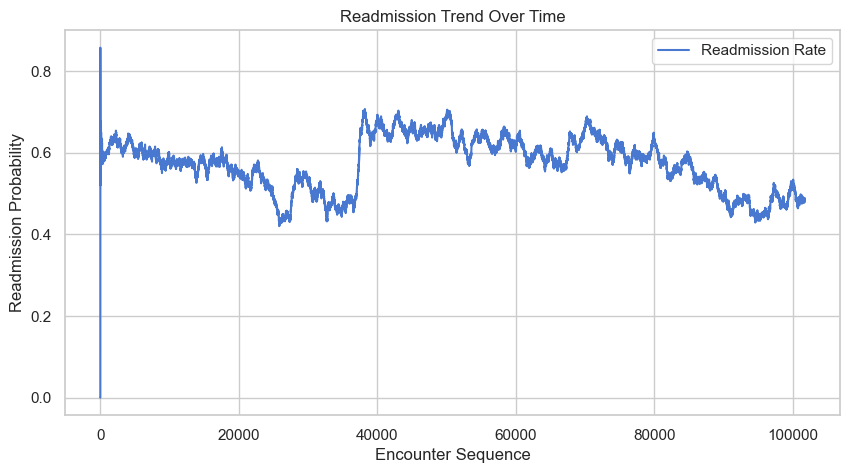

In [50]:
df['readmitted'] = df['readmitted'].map({'NO': 0, '>30': 1, '<30': 2})
df['readmitted'] = df['readmitted'].astype(int)  # Ensure numeric type
df = df.sort_values(by='encounter_id')
df['encounter_index'] = range(len(df))

df['rolling_avg'] = df['readmitted'].rolling(window=1000, min_periods=1).mean()

plt.figure(figsize=(10, 5))
plt.plot(df['encounter_index'], df['rolling_avg'], label='Readmission Rate')
plt.xlabel('Encounter Sequence')
plt.ylabel('Readmission Probability')
plt.title('Readmission Trend Over Time')
plt.legend()
plt.show()


### Handle Multicollinearity & Drop Unnecessary Columns

- Since encounter_id and patient_nbr are unique identifiers, they don't contribute to model learning. Drop them.

In [51]:
df = df.drop(columns=['encounter_id', 'patient_nbr'])


In [52]:
df.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'payer_code',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_type_desc', 'discharge_disposition_desc',
       'admission_source_desc', 'age_midpoint', 'age_group', 'comorbidity',
       'encounter_index', 'rolling_avg'],
      dtype='object')

### ==> # Feature Selection: Drop unnecessary columns

### ==> # Splitting numerical and categorical features

In [53]:
# Identify object (categorical) columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

#### To check multicollinearity, compute the correlation matrix and look for highly correlated features (e.g., Pearson correlation > 0.8).

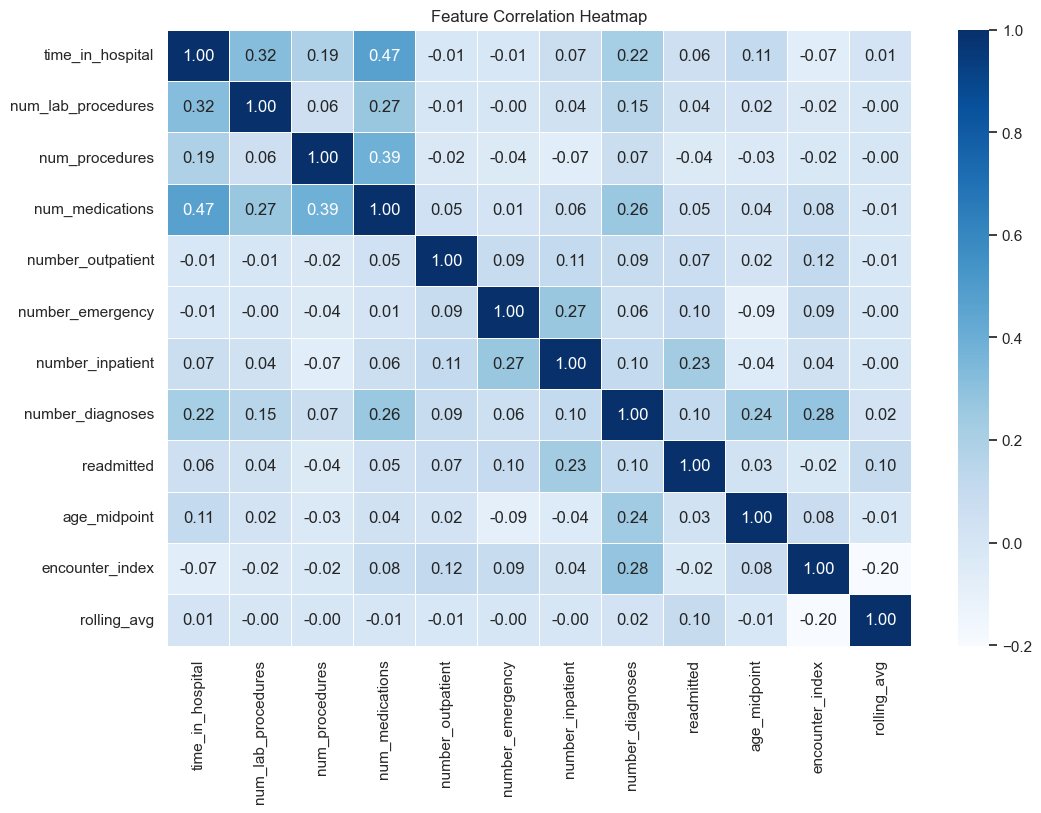

In [54]:
# Compute correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.savefig("Feature Correlation Heatmap.png")
plt.show()

## Feature Selection Recommendations

### Keep these features (High Importance for Model) ✅
- **time_in_hospital**: Correlates with medications, crucial for patient analysis.
- **num_lab_procedures**: Important for medical testing.
- **num_medications**: Directly affects patient treatment.
- **number_inpatient**: Strong correlation with hospital stay, useful.
- **number_diagnoses**: Critical for severity estimation.
- **age_midpoint**: Age can be a crucial factor for risk prediction.

### Remove these features (To avoid redundancy) ❌
- **num_procedures**: Correlates with num_lab_procedures.
- **number_outpatient**: Low correlation with most features.
- **number_emergency**: Low correlation, may not contribute much.

In [55]:
print(df['readmitted'].value_counts())


readmitted
0    54864
1    35545
2    11357
Name: count, dtype: int64


### data preprocessing for applying models:

In [56]:
# Splitting data into features and target
X = df.drop(columns=['readmitted'])
y = df['readmitted']


# Encoding target variable
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)


X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Splitting data into train and test sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)

y_train = (y_train == 2).astype(int) 
# Splitting numerical and categorical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns


### ==> Normalize the features

In [57]:
# Scaling numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Encoding categorical features using Label Encoding (Handling unseen labels in test set)
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = X_test[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)
    label_encoders[col] = le  # Store encoders if inverse transform is needed




In [58]:

# 继续 SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

y_train = pd.Series(y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import pandas as pd


# L1特征选择
def select_features_by_l1(X, y, top_n=15):
    clf = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
    clf.fit(X, y)
    coefs = np.abs(clf.coef_[0])
    feature_ranking = pd.Series(coefs, index=X.columns).sort_values(ascending=False)
    return feature_ranking.head(top_n).index.tolist()

# MI特征选择
def select_features_by_mi(X, y, top_n=15):
    mi = mutual_info_classif(X, y, random_state=42)
    feature_ranking = pd.Series(mi, index=X.columns).sort_values(ascending=False)
    return feature_ranking.head(top_n).index.tolist()

# Tree-based特征选择
def select_features_by_tree(X, y, top_n=15):
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X, y)
    importances = clf.feature_importances_
    feature_ranking = pd.Series(importances, index=X.columns).sort_values(ascending=False)
    return feature_ranking.head(top_n).index.tolist()

feature_selectors = {
    'L1': select_features_by_l1,
    'MutualInfo': select_features_by_mi,
    'TreeImportance': select_features_by_tree
}


# 设置 top_n
top_n = 15

# 保存每个方法下选出的特征
selected_feature_log = {}

for fs_name, fs_func in feature_selectors.items():
    selected_cols = fs_func(X_train, y_train, top_n=top_n)
    selected_feature_log[fs_name] = selected_cols

# 打印每个方法的 Top-N 特征
for method, features in selected_feature_log.items():
    print(f"\nTop {len(features)} features selected by {method}:")
    for f in features:
        print(f"- {f}")




In [60]:
import json
top_n = 15
json_path = f"selected_feature_log_top{top_n}.json"


# 保存 Top-N 特征结果到 JSON 文件
with open("selected_feature_log_top15.json", "w") as f:
    json.dump(selected_feature_log, f, indent=4)

In [61]:

def get_models():
    return {
        'LogisticRegression': LogisticRegression(solver='liblinear', random_state=42),
        'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
        'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
    }


In [62]:
# 模型评估函数（使用5折CV计算AUC和F1）
def evaluate_model_with_cv(model, X, y):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = []
    f1_scores = []

    for train_idx, test_idx in skf.split(X, y):
        X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
        y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_test_cv)
        y_prob = model.predict_proba(X_test_cv)[:, 1]

        auc_scores.append(roc_auc_score(y_test_cv, y_prob))
        f1_scores.append(f1_score(y_test_cv, y_pred))

    return np.mean(auc_scores), np.mean(f1_scores)

In [63]:
def run_feature_selection_experiments(X_train, y_train, feature_selectors, top_n=15):
    models = get_models()
    results = []
    selected_feature_log = {}  # 新增：记录每种方法选出的特征列表

    for fs_name, fs_func in feature_selectors.items():
        selected_cols = fs_func(X_train, y_train, top_n=top_n)
        selected_feature_log[fs_name] = selected_cols  # 保存特征名列表
        X_selected = X_train[selected_cols]

        for model_name, model in models.items():
            auc, f1 = evaluate_model_with_cv(model, X_selected, y_train)
            results.append({
                'Feature_Selection': fs_name,
                'Model': model_name,
                'Top_N_Features': top_n,
                'AUC': round(auc, 3),
                'F1_score': round(f1, 3)
            })

    results_df = pd.DataFrame(results)
    return results_df, selected_feature_log


In [64]:
results_df, selected_feature_log = run_feature_selection_experiments(X_train, y_train, feature_selectors, top_n=15)

# 输出结果表格
print(results_df)

# print("\nTop-N features selected by each method:")
# for method, features in selected_feature_log.items():
#     print(f"\nTop {len(features)} features selected by {method}:")
#     for f in features:
#         print(f"- {f}")


/opt/anaconda3/envs/PPHR/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


  Feature_Selection               Model  Top_N_Features    AUC  F1_score
0                L1  LogisticRegression              15  0.893     0.797
1                L1        RandomForest              15  0.905     0.825
2                L1             XGBoost              15  0.897     0.817
3        MutualInfo  LogisticRegression              15  0.670     0.580
4        MutualInfo        RandomForest              15  0.965     0.933
5        MutualInfo             XGBoost              15  0.958     0.931
6    TreeImportance  LogisticRegression              15  0.732     0.667
7    TreeImportance        RandomForest              15  0.963     0.930
8    TreeImportance             XGBoost              15  0.957     0.930


In [65]:
import json

# 保存成 json 文件，方便后续导入进行分组分析
with open("selected_features_by_method.json", "w") as f:
    json.dump({k: list(v) for k, v in selected_feature_log.items()}, f, indent=2)


In [66]:


# # Step 1: 对所有特征进行分类
# all_features = [
#     'encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'time_in_hospital',
#     'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications',
#     'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
#     'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
#     'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
#     'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
#     'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
#     'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
#     'admission_type_desc', 'discharge_disposition_desc', 'admission_source_desc'
# ]

# # 定义分类字典
# category_definitions = {
#     "Demographic": ['race', 'gender', 'age'],
#     "Administrative": ['encounter_id', 'patient_nbr', 'admission_type_desc', 'admission_source_desc', 'discharge_disposition_desc', 'payer_code', 'change'],
#     "Clinical": ['diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'number_inpatient', 'number_outpatient', 'number_emergency', 'medical_specialty'],
#     "Utilization": ['num_lab_procedures', 'num_procedures', 'num_medications', 'time_in_hospital'],
#     "Medication": [
#         'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
#         'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
#         'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
#         'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
#         'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone',
#         'diabetesMed'
#     ],
#     "Label": ['readmitted']
# }

# # 构建映射
# feature_category_map = {}
# for cat, feats in category_definitions.items():
#     for f in feats:
#         feature_category_map[f] = cat

# # 假设你刚刚这样运行过模型：
# # results_df, selected_feature_log = run_feature_selection_experiments(X_train, y_train, feature_selectors, top_n=15)

# # 现在我们不再手动输入，而是自动读取每种方法选出的 Top-N 特征
# all_topn_features = []
# for method, features in selected_feature_log.items():
#     all_topn_features.extend(features)

# # 去重后汇总为最终 topn 特征列表（有助于统一分类）
# topn_features = list(set(all_topn_features))




# # 自动分类 topN 特征
# topn_categorized = []
# for feat in topn_features:
#     category = feature_category_map.get(feat, "Derived")
#     topn_categorized.append((feat, category))

# df_topn_classified = pd.DataFrame(topn_categorized, columns=["Feature", "Category"])

# # Step 3: 创建新子类（如 Medication_15），只包括 topN 中的特征
# n = len(topn_features)
# subcategories = {}
# for feature, category in topn_categorized:
#     key = f"{category}_{n}"
#     subcategories.setdefault(key, []).append(feature)

# df_subcat_summary = pd.DataFrame(
#     [(k, v) for k, v in subcategories.items()],
#     columns=["New Category", "Top Features"]
# )

# # 显示两个表格结果
# display(df_topn_classified)
# display(df_subcat_summary)


In [67]:
categories = {
    "Demographic": [
        "age_midpoint", "age_group", "age"
    ],
    "Medication": [
        "tolbutamide", "miglitol", "glipizide-metformin", "pioglitazone", "rosiglitazone",
        "glyburide-metformin", "glimepiride", "metformin", "tolazamide", "nateglinide", "glyburide", "insulin"
    ],
    "Administrative": [
        "change", "admission_source_desc", "discharge_disposition_desc",
        "payer_code", "encounter_index"
    ],
    "Clinical": [
        "number_diagnoses", "number_inpatient", "number_outpatient",
        "number_emergency", "diag_1", "diag_2", "medical_specialty"
    ],
    "Utilization": [
        "num_lab_procedures", "rolling_avg", "num_medications", "time_in_hospital", "num_procedures"
    ]
}



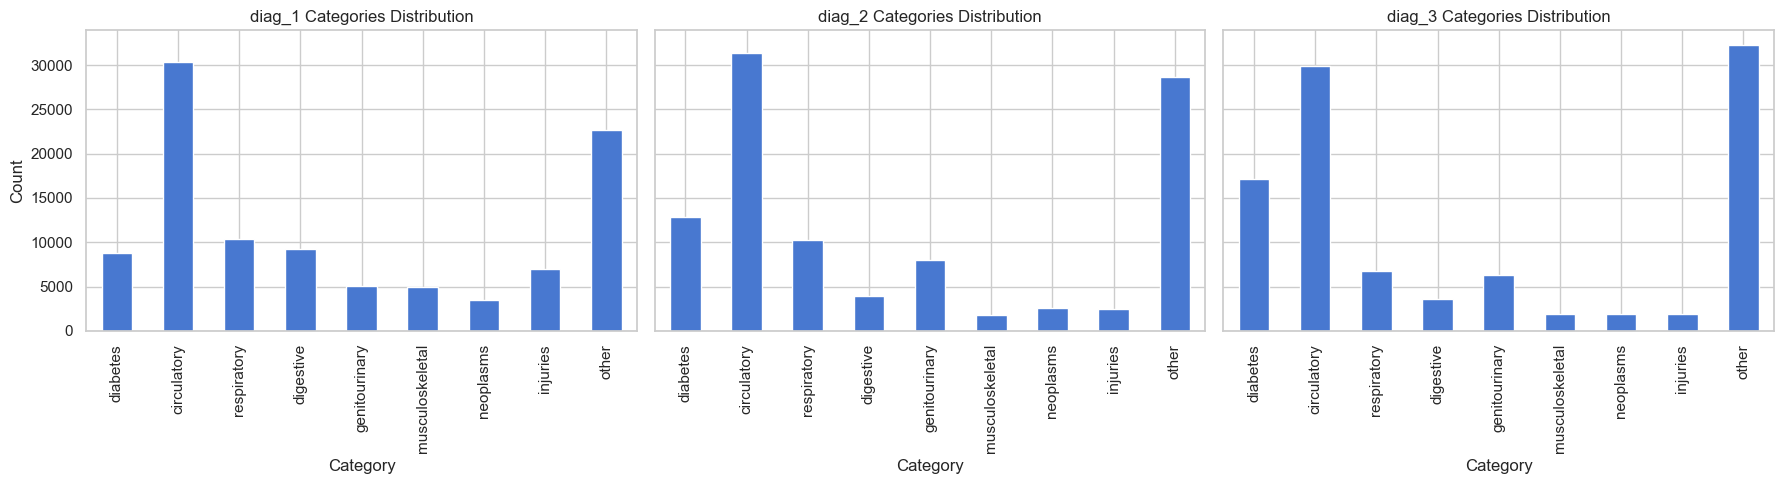

,race,gender,age,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,age_group,comorbidity,encounter_index,rolling_avg,diag_1,diag_2,diag_3,diag_1_category,diag_2_category,diag_3_category
8,Caucasian,Female,[80-90),13,Unknown,Unknown,68,2,28,0,...,80-90,Other,0,0.00,398,427,38,circulatory,circulatory,other
9,Caucasian,Female,[90-100),12,Unknown,InternalMedicine,33,3,18,0,...,90-100,Other,1,0.00,434,198,486,circulatory,neoplasms,respiratory
4,Caucasian,Male,[40-50),1,Unknown,Unknown,51,0,8,0,...,40-50,Other,2,0.00,197,157,250,neoplasms,neoplasms,diabetes
10,AfricanAmerican,Female,[40-50),9,Unknown,Unknown,47,2,17,0,...,40-50,Diabetes,3,0.25,250.7,403,996,diabetes,circulatory,injuries
5,Caucasian,Male,[50-60),3,Unknown,Unknown,31,6,16,0,...,50-60,Heart Disease,4,0.40,414,411,250,circulatory,circulatory,diabetes


In [68]:
# Function to categorize ICD-9 codes into nine categories
# The categories of primary diagnosis (diag_1), secondary diagnosis (diag_2), and additional secondary diagnosis (diag_3) were regrouped according to ICD9 into 9 categories: circulatory, respiratory, digestive, diabetes, injuries, musculoskeletal, genitourinary, neoplasms, and other.
def icd9_to_nine_category(code):
    try:
        code = str(code).strip()
        if code.startswith('E') or code.startswith('V'):
            return 'other'
        num = float(code)
        if 390 <= num <= 459:
            return 'circulatory'
        elif 460 <= num <= 519:
            return 'respiratory'
        elif 520 <= num <= 579:
            return 'digestive'
        elif 250.0 <= num < 251.0:
            return 'diabetes'
        elif 800 <= num <= 999:
            return 'injuries'
        elif 710 <= num <= 739:
            return 'musculoskeletal'
        elif 580 <= num <= 629:
            return 'genitourinary'
        elif 140 <= num <= 239:
            return 'neoplasms'
        else:
            return 'other'
    except:
        return 'other'

# Visualize the diagnostic distribution
for col in ['diag_1', 'diag_2', 'diag_3']:
    df[f"{col}_category"] = df[col].apply(icd9_to_nine_category)

diag_cols = ['diag_1_category', 'diag_2_category', 'diag_3_category']
titles = ['diag_1 Categories Distribution', 'diag_2 Categories Distribution', 'diag_3 Categories Distribution']
category_order = ['diabetes', 'circulatory', 'respiratory', 'digestive',
                  'genitourinary', 'musculoskeletal', 'neoplasms', 'injuries', 'other']

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, col in enumerate(diag_cols):
    counts = df[col].value_counts().reindex(category_order, fill_value=0)
    counts.plot(kind='bar', ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Category")
    if i == 0:
        axes[i].set_ylabel("Count")

# for col in ['diag_1_category', 'diag_2_category', 'diag_3_category']:
#     counts = df[col].value_counts().reindex(category_order, fill_value=0)
#     counts.plot(kind='bar', title=f"{col} Distribution", figsize=(8,4))
#     plt.xlabel("Category")
#     plt.ylabel("Count")
#     plt.tight_layout()
#     plt.show()

plt.tight_layout()
plt.show()

cols = [col for col in df.columns if not col.startswith('diag_')] \
     + [col for col in df.columns if col.startswith('diag_') and not col.endswith('_category')] \
     + [col for col in df.columns if col.endswith('_category')]
df = df[cols]

df.head()

In [69]:
# 显示所有列名
print(df.columns.tolist())

['race', 'gender', 'age', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'admission_type_desc', 'discharge_disposition_desc', 'admission_source_desc', 'age_midpoint', 'age_group', 'comorbidity', 'encounter_index', 'rolling_avg', 'diag_1', 'diag_2', 'diag_3', 'diag_1_category', 'diag_2_category', 'diag_3_category']


In [70]:
category_definitions = {
    "Demographic": [
        'race', 'gender', 'age', 'age_midpoint', 'age_group'
    ],
    "Administrative": [
        'encounter_index', 'admission_type_desc', 'admission_source_desc',
        'discharge_disposition_desc', 'payer_code', 'change'
    ],
    "Clinical": [
        'diag_1', 'diag_2', 'diag_3',
        'number_diagnoses', 'number_inpatient', 'number_outpatient', 'number_emergency',
        'medical_specialty', 'comorbidity','diag_1_category', 'diag_2_category', 'diag_3_category'
    ],
    "Utilization": [
        'num_lab_procedures', 'num_procedures', 'num_medications',
        'time_in_hospital', 'rolling_avg'
    ],
    "Medication": [
        'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
        'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
        'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
        'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
        'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone',
        'diabetesMed'
    ],
   
    "Label": [
        'readmitted'
    ]
}


In [71]:
# fs_category_summary = {}

# for method, features in selected_feature_log.items():
#     counts = {}
#     for f in features:
#         cat = feature_to_category.get(f, 'Unclassified')
#         counts[cat] = counts.get(cat, 0) + 1
#     fs_category_summary[method] = counts

# # 转成 DataFrame
# fs_category_df = pd.DataFrame(fs_category_summary).fillna(0).astype(int)
# fs_category_df

In [72]:

# ✅ 2. 构造 feature → 功能分类映射字典
feature_to_category = {}
for cat, feats in category_definitions.items():
    for f in feats:
        feature_to_category[f] = cat

# 读取
with open("selected_feature_log_top15.json", "r") as f:
    selected_feature_log = json.load(f)

# ✅ 4. 构建归类结构列表（每个特征 → FS 方法 → 两个分类体系）
rows = []
for method, features in selected_feature_log.items():
    for feat in features:
        general_cat = feature_to_category.get(feat, 'Unclassified')
        if feat == 'diag_1':
            icd9_cat = df['diag_1_category'].mode()[0]
        elif feat == 'diag_2':
            icd9_cat = df['diag_2_category'].mode()[0]
        elif feat == 'diag_3':
            icd9_cat = df['diag_3_category'].mode()[0]
        else:
            icd9_cat = 'N/A'
        rows.append({
            "Feature": feat,
            "FS_Method": method,
            "Functional_Category": general_cat,
            "ICD9_Category": icd9_cat
        })

df_feature_category = pd.DataFrame(rows)
display(df_feature_category)




,Feature,FS_Method,Functional_Category,ICD9_Category
0,age_midpoint,L1,Demographic,N/A
1,age_group,L1,Demographic,N/A
2,age,L1,Demographic,N/A
3,tolbutamide,L1,Medication,N/A
4,change,L1,Administrative,N/A
5,tolazamide,L1,Medication,N/A
6,rosiglitazone,L1,Medication,N/A
7,pioglitazone,L1,Medication,N/A
8,miglitol,L1,Medication,N/A
9,glyburide-metformin,L1,Medication,N/A


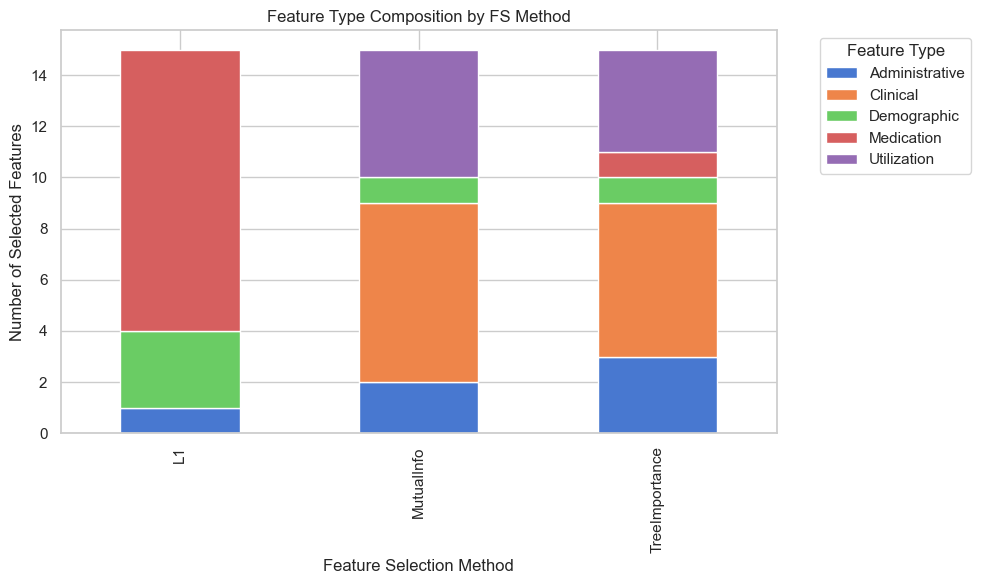

In [73]:
# 统计 FS 方法 × 功能分类 的数量分布
# 结构偏好分析（特征类别 × FS 方法）
# 这是用于回答你研究问题中的核心一项：

# “不同的 FS 方法是否偏好某类特征？”
summary = df_feature_category.groupby(['FS_Method', 'Functional_Category'])['Feature'].count().unstack().fillna(0).astype(int)

# 可视化
import matplotlib.pyplot as plt
summary.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Feature Type Composition by FS Method")
plt.xlabel("Feature Selection Method")
plt.ylabel("Number of Selected Features")
plt.legend(title="Feature Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


### Patient Clusters Based on Readmission Trends

We performed Principal Component Analysis (PCA) to reduce the dimensionality of our data and applied KMeans clustering to group similar patients. The dataset was divided into **three clusters (0, 1, 2)** based on their clinical and demographic characteristics.

#### **Cluster Distribution and Readmission Trends**
- **Cluster 0**: Contains **27,416 patients**, with a balanced distribution of readmission categories.
- **Cluster 1**: The largest group with **73,483 patients**, showing a nearly equal proportion of all readmission statuses.
- **Cluster 2**: Contains **30,774 patients**, with slightly higher readmission rates.

#### **Key Insights:**
1. **Cluster 1 dominates the dataset**, indicating that most patients fall into a central category with similar risk profiles.
2. **Clusters 0 and 2 show more variation in readmission rates**, which suggests that specific patient groups may have different risk factors.
3. The balanced proportions across clusters imply that no single cluster is overwhelmingly responsible for readmissions, reinforcing the complexity of the problem.

*******************